In [2]:
# !pip install pygraphviz
import networkx as nx
from myGAMDIV import *
from mycolors import *
from avalia import *
from LPA_Fuzzy import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from networkx.algorithms import community
import itertools
from fcmeans import FCM
from sklearn.metrics import accuracy_score

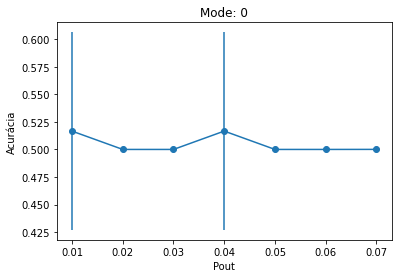

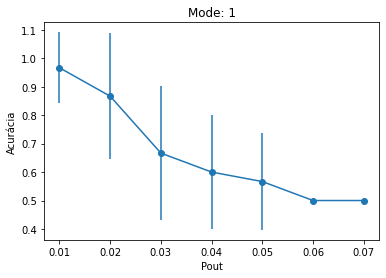

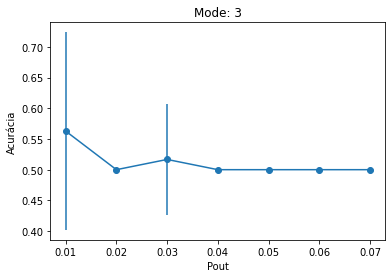

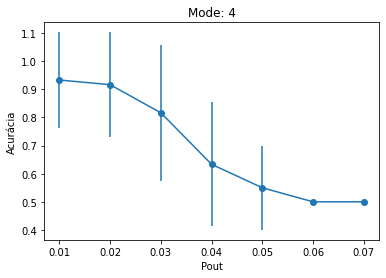

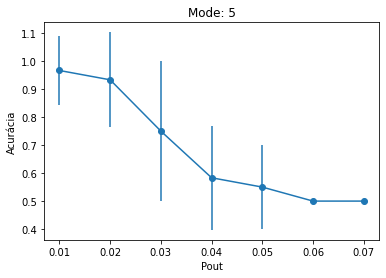

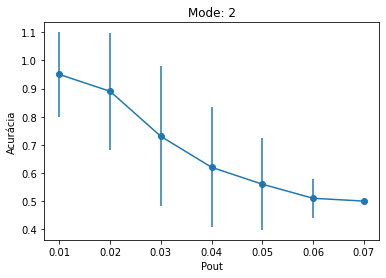

<Figure size 432x288 with 0 Axes>

In [11]:
#data = makeTestChangingP(0.1,0.01,0.075,50,2,2,False,[2])
#df = pd.DataFrame(data)
#df = pd.read_pickle("./communities_2_2_labels.pkl").append(df,ignore_index=True)
for mode in df["mode"].unique():
    plt.title(f"Mode: {mode}")
    plt.errorbar(x=df[df["mode"] == mode]["pout"],y=df[df["mode"] == mode]["acc"],yerr=df[df["mode"] == mode]["std"],fmt='o-')
    plt.ylabel("Acurácia")
    plt.xlabel("Pout")
    plt.show()
    plt.clf()

In [12]:
df.to_pickle("./communities_2_2_labels.pkl")

In [2]:
#df = pd.read_pickle("./communities_2_2_labels.pkl")

# Acurácia sem reinicialização e K = |V|

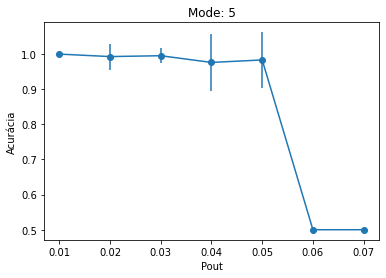

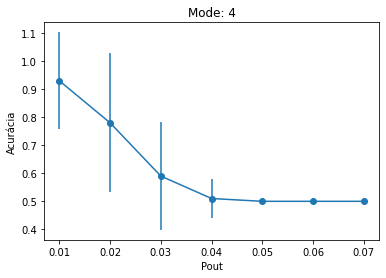

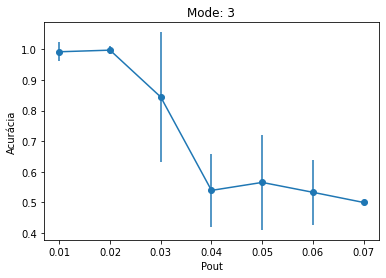

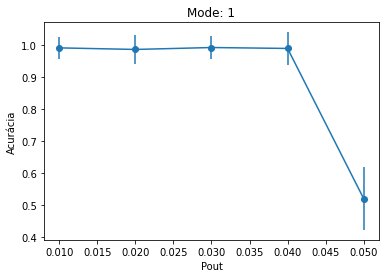

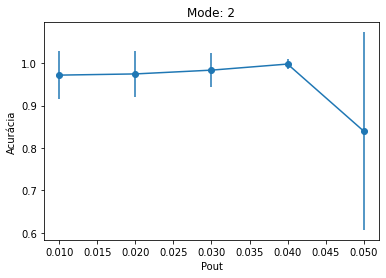

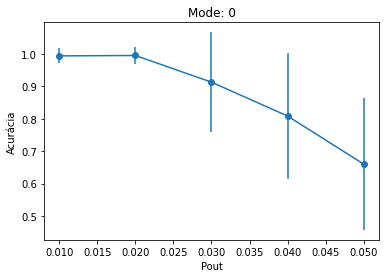

<Figure size 432x288 with 0 Axes>

In [4]:
# data = makeTestChangingP(0.1,0.07,0.075,50,2,2000,False,[2,1,0])
# df = pd.DataFrame(data)
# df = pd.read_pickle("./communities_2_V_labels.pkl").append(df,ignore_index=True)
df = pd.read_pickle("./communities_2_V_labels.pkl")
df = df.sort_values(by="pout")
for mode in df["mode"].unique():
    plt.title(f"Mode: {mode}")
    plt.errorbar(x=df[df["mode"] == mode]["pout"],y=df[df["mode"] == mode]["acc"],yerr=df[df["mode"] == mode]["std"],fmt='o-')
    plt.ylabel("Acurácia")
    plt.xlabel("Pout")
    plt.show()
    plt.clf()

In [ ]:
df[df["pout"] == 0.06]

In [ ]:
df.to_pickle("./communities_2_V_labels.pkl")

In [2]:
#df = pd.read_pickle("./communities_2_V_labels.pkl")

# Acurácia dada a inicialização K = |V|

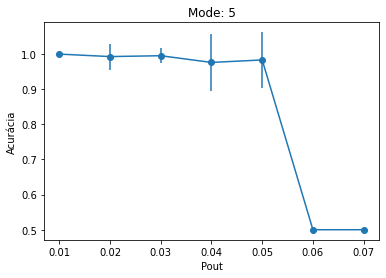

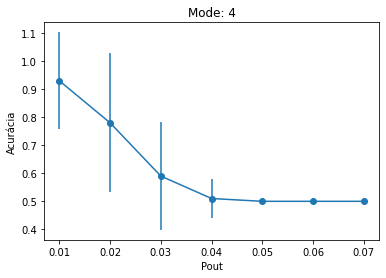

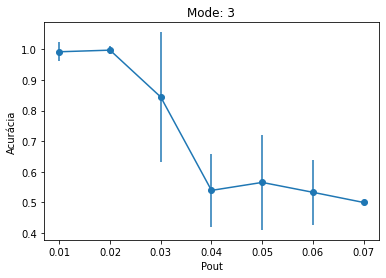

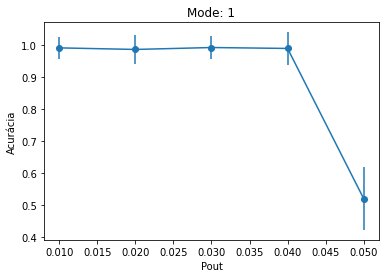

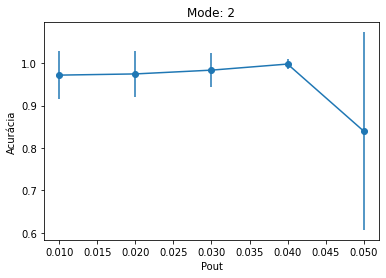

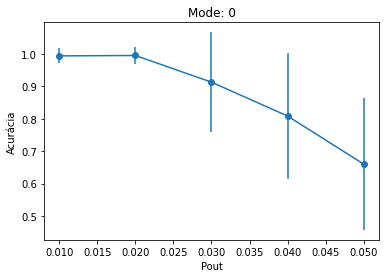

<Figure size 432x288 with 0 Axes>

In [3]:
#data = makeTestChangingP(0.1,0.06,0.075,50,2,2000,True,[2,1,0])
#df2 = pd.DataFrame(data)
#df2 = pd.read_pickle("./communities_2_V_labels_restart.pkl").append(df2,ignore_index=True)
#df2 = df2.sort_values(by="pout")
df2 = pd.read_pickle("./communities_2_V_labels_restart.pkl")
for mode in df2["mode"].unique():
    plt.title(f"Mode: {mode}")
    plt.errorbar(x=df2[df2["mode"] == mode]["pout"],y=df2[df2["mode"] == mode]["acc"],yerr=df2[df2["mode"] == mode]["std"],fmt='o-')
    plt.ylabel("Acurácia")
    plt.xlabel("Pout")
    plt.show()
    plt.clf()

In [ ]:
df2.to_pickle("./communities_2_V_labels_restart.pkl")

In [ ]:
#g = sns.FacetGrid(df_results[df_results['retry'] == False][['acc','mode','k']], col="mode", height=4, aspect=.5)
#g.map(sns.barplot, "k", "acc",order=[2,2000])

In [ ]:
#g = sns.FacetGrid(df_results[df_results['k'] == 2000][['acc','mode','retry']], col="mode", height=4, aspect=.5)
#g.map(sns.barplot, "retry", "acc",order=[True,False])